In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer




In [2]:
# Load dataset
df = pd.read_csv("Day_16_Healthcare_Data.csv")

In [3]:
# Display missing values percentage
missing_percentage = df.isna().mean() * 100
print("Missing Values Percentage:\n", missing_percentage)

Missing Values Percentage:
 Patient_ID        0.000000
Age               0.000000
Gender            4.158416
Blood_Pressure    5.940594
Cholesterol       3.960396
Diabetes          0.000000
Heart_Disease     0.000000
dtype: float64


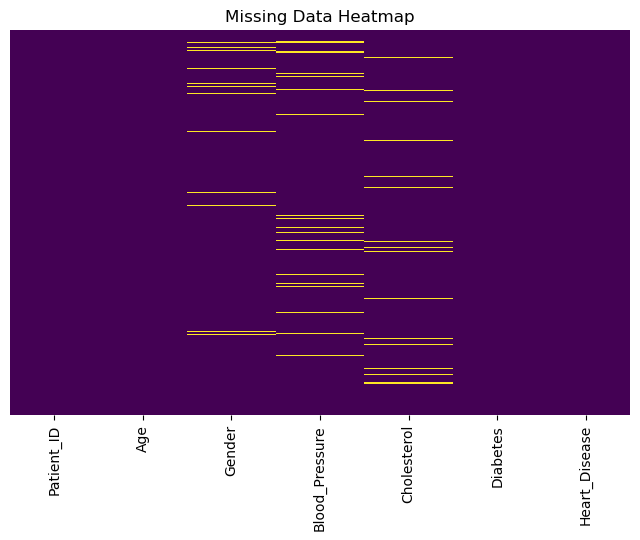

In [4]:
# Visualize missing data
plt.figure(figsize=(8, 5))
sns.heatmap(df.isna(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

In [6]:
# Mean/Median Imputation for numerical columns
df['Blood_Pressure'].fillna(df['Blood_Pressure'].mean(), inplace=True)
df['Cholesterol'].fillna(df['Cholesterol'].median(), inplace=True)

# Mode Imputation for categorical column
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# KNN Imputation
imputer = KNNImputer(n_neighbors=5)
df[['Blood_Pressure', 'Cholesterol']] = imputer.fit_transform(df[['Blood_Pressure', 'Cholesterol']])

# Display final missing values check
print("\nMissing Values After Imputation:\n", df.isna().sum())

# Save cleaned dataset
df.to_csv("Cleaned_Healthcare_Data.csv", index=False)


Missing Values After Imputation:
 Patient_ID        0
Age               0
Gender            0
Blood_Pressure    0
Cholesterol       0
Diabetes          0
Heart_Disease     0
dtype: int64


C:\Users\AB\AppData\Local\Temp\ipykernel_11796\739671370.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Blood_Pressure'].fillna(df['Blood_Pressure'].mean(), inplace=True)
C:\Users\AB\AppData\Local\Temp\ipykernel_11796\739671370.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 